In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import sklearn

import warnings
warnings.filterwarnings("ignore")

print("Версия LightGBM      : ", lgb.__version__)
print("Версия Scikit-Learn  : ", sklearn.__version__)

Версия LightGBM      :  3.2.1
Версия Scikit-Learn  :  0.23.2


In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

for line in boston.DESCR.split("\n")[5:29]:
    print(line)

boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target

boston_df.head()

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

for line in breast_cancer.DESCR.split("\n")[5:31]:
    print(line)

breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names)
breast_cancer_df["TumorType"] = breast_cancer.target

breast_cancer_df.head()

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
       

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TumorType
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
from sklearn.datasets import load_wine

wine = load_wine()

for line in wine.DESCR.split("\n")[5:29]:
    print(line)

wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df["WineType"] = wine.target

wine_df.head()

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=boston.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=boston.feature_names.tolist())

booster = lgb.train({"objective": "regression"},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

Размеры Train/Test:  (379, 13) (127, 13) (379,) (127,)
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 379, number of used features: 13
[LightGBM] [Info] Start training from score 22.695778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 73.5162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 63.9734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 55.9902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 49.3059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 43.8851
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l2: 39.9

In [6]:
from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("Test  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))

Test  R2 Score : 0.65
Train R2 Score : 0.76


In [7]:
idxs = booster.predict(X_test, pred_leaf=True)
print("Размерность: ", idxs.shape)
idxs

Размерность:  (127, 10)


array([[ 6,  2,  6, ...,  8,  7,  5],
       [ 0, 11,  0, ...,  0,  0,  3],
       [ 0, 11, 10, ..., 11, 10, 10],
       ...,
       [11,  9, 11, ...,  9,  2,  2],
       [ 8, 13, 14, ...,  3, 10,  3],
       [12, 12, 13, ..., 12, 14, 13]])

In [8]:
shap_vals = booster.predict(X_test, pred_contrib=True)

print("Размерность: ", shap_vals.shape)

print("\nЗначения Shap для нулевого семпла: ", shap_vals[0])
print("\nПредсказания с использованием значений SHAP: ", shap_vals[0].sum())
print("Предсказания без SHAP: ", test_preds[0])

Размерность:  (127, 14)

Значения Shap для нулевого семпла:  [ 6.08435784e-01 -7.65683856e-03  4.79486169e-02  0.00000000e+00
 -9.22280435e-01 -2.23337865e+00  5.38478246e-03  9.65280002e-02
  1.42292869e-02 -4.42449413e-02  1.95472418e-01 -3.27114251e-02
 -4.06990009e+00  2.26957784e+01]

Предсказания с использованием значений SHAP:  16.353604917321157
Предсказания без SHAP:  16.353604917321153


In [9]:
booster.feature_importance(importance_type="gain"), booster.feature_importance(importance_type="split")

(array([1.89365149e+03, 1.89477997e+02, 1.60890800e+02, 0.00000000e+00,
        3.93580769e+03, 8.21278741e+04, 9.33771000e+01, 8.19451504e+02,
        5.99732018e+01, 3.01901997e+02, 1.18216750e+03, 1.06316601e+02,
        3.62274934e+04]),
 array([10,  1,  3,  0, 13, 29,  3, 10,  1,  6, 13,  2, 47]))

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=breast_cancer.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=breast_cancer.feature_names.tolist())


booster = lgb.train({"objective": "binary", "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

from sklearn.metrics import accuracy_score


test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("Test Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

Размеры Train/Test:  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's binary_logloss: 0.595597
[2]	valid_0's binary_logloss: 0.533859
[3]	valid_0's binary_logloss: 0.482705
[4]	valid_0's binary_logloss: 0.44175
[5]	valid_0's binary_logloss: 0.404826
[6]	valid_0's binary_logloss: 0.37389
[7]	valid_0's binary_logloss: 0.34501
[8]	valid_0's binary_logloss: 0.32078
[9]	valid_0's binary_logloss: 0.299864
[10]	valid_0's binary_logloss: 0.282976
Test Accuracy: 0.93
Train Accuracy: 0.97


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=wine.feature_names)
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=wine.feature_names)


booster = lgb.train({"objective": "multiclass", "num_class":3, "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

from sklearn.metrics import accuracy_score


test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = np.argmax(test_preds, axis=1)
train_preds = np.argmax(train_preds, axis=1)

print("\nTest Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

Размеры Train/Test:  (133, 13) (45, 13) (133,) (45,)
[1]	valid_0's multi_logloss: 1.0045
[2]	valid_0's multi_logloss: 0.892843
[3]	valid_0's multi_logloss: 0.792942
[4]	valid_0's multi_logloss: 0.713834
[5]	valid_0's multi_logloss: 0.649912
[6]	valid_0's multi_logloss: 0.595134
[7]	valid_0's multi_logloss: 0.55074
[8]	valid_0's multi_logloss: 0.506992
[9]	valid_0's multi_logloss: 0.472991
[10]	valid_0's multi_logloss: 0.444638

Test Accuracy: 0.91
Train Accuracy: 1.00


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Размеры Train/Test Sizes: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="regression", n_estimators=10)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),], eval_metric="rmse")

from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score: %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score: %.2f"%r2_score(Y_train, train_preds))

Размеры Train/Test Sizes:  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's rmse: 8.02963	valid_0's l2: 64.4749
[2]	valid_0's rmse: 7.45783	valid_0's l2: 55.6193
[3]	valid_0's rmse: 6.92764	valid_0's l2: 47.9922
[4]	valid_0's rmse: 6.47944	valid_0's l2: 41.9831
[5]	valid_0's rmse: 6.08505	valid_0's l2: 37.0279
[6]	valid_0's rmse: 5.74895	valid_0's l2: 33.0504
[7]	valid_0's rmse: 5.40211	valid_0's l2: 29.1828
[8]	valid_0's rmse: 5.17045	valid_0's l2: 26.7335
[9]	valid_0's rmse: 4.97129	valid_0's l2: 24.7137
[10]	valid_0's rmse: 4.76924	valid_0's l2: 22.7456

Test  R2 Score: 0.68
Train R2 Score: 0.74


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Размеры Train/Test Sizes: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="binary", n_estimators=10,)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),])

from sklearn.metrics import accuracy_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("Test  Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

Размеры Train/Test Sizes:  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's binary_logloss: 0.604156
[2]	valid_0's binary_logloss: 0.540771
[3]	valid_0's binary_logloss: 0.48937
[4]	valid_0's binary_logloss: 0.440767
[5]	valid_0's binary_logloss: 0.401444
[6]	valid_0's binary_logloss: 0.365418
[7]	valid_0's binary_logloss: 0.336999
[8]	valid_0's binary_logloss: 0.30941
[9]	valid_0's binary_logloss: 0.284722
[10]	valid_0's binary_logloss: 0.26341
Test  Accuracy: 0.95
Train Accuracy: 0.98


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Размеры Train/Test Sizes: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMRegressor(objective="regression_l2", n_estimators=10,)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),], eval_metric=["rmse", "l2", "l1"])

print("Test  R2 Score: %.2f"%booster.score(X_train, Y_train))
print("Train R2 Score: %.2f"%booster.score(X_test, Y_test))

Размеры Train/Test Sizes:  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's rmse: 8.74865	valid_0's l2: 76.5389	valid_0's l1: 6.41991
[2]	valid_0's rmse: 8.17666	valid_0's l2: 66.8577	valid_0's l1: 5.99106
[3]	valid_0's rmse: 7.67456	valid_0's l2: 58.8988	valid_0's l1: 5.59962
[4]	valid_0's rmse: 7.23948	valid_0's l2: 52.41	valid_0's l1: 5.2527
[5]	valid_0's rmse: 6.85127	valid_0's l2: 46.9399	valid_0's l1: 4.95957
[6]	valid_0's rmse: 6.50792	valid_0's l2: 42.353	valid_0's l1: 4.68955
[7]	valid_0's rmse: 6.22305	valid_0's l2: 38.7263	valid_0's l1: 4.47693
[8]	valid_0's rmse: 5.9373	valid_0's l2: 35.2515	valid_0's l1: 4.23934
[9]	valid_0's rmse: 5.74497	valid_0's l2: 33.0047	valid_0's l1: 4.07843
[10]	valid_0's rmse: 5.52914	valid_0's l2: 30.5714	valid_0's l1: 3.90271
Test  R2 Score: 0.75
Train R2 Score: 0.65


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMClassifier(objective="binary", n_estimators=10)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),])

print("Test  Accuracy: %.2f"%booster.score(X_test, Y_test))
print("Train Accuracy: %.2f"%booster.score(X_train, Y_train))

Размеры Train/Test:  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's binary_logloss: 0.572407
[2]	valid_0's binary_logloss: 0.511454
[3]	valid_0's binary_logloss: 0.464948
[4]	valid_0's binary_logloss: 0.422592
[5]	valid_0's binary_logloss: 0.389265
[6]	valid_0's binary_logloss: 0.36136
[7]	valid_0's binary_logloss: 0.333443
[8]	valid_0's binary_logloss: 0.312657
[9]	valid_0's binary_logloss: 0.291259
[10]	valid_0's binary_logloss: 0.275733
Test  Accuracy: 0.94
Train Accuracy: 0.98


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMClassifier(objective="multiclassova", n_estimators=10, num_class=3)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),])

print("Test  Accuracy: %.2f"%booster.score(X_test, Y_test))
print("Train Accuracy: %.2f"%booster.score(X_train, Y_train))

Размеры Train/Test:  (133, 13) (45, 13) (133,) (45,)
[1]	valid_0's multi_logloss: 0.952574
[2]	valid_0's multi_logloss: 0.852091
[3]	valid_0's multi_logloss: 0.775938
[4]	valid_0's multi_logloss: 0.714012
[5]	valid_0's multi_logloss: 0.669557
[6]	valid_0's multi_logloss: 0.618971
[7]	valid_0's multi_logloss: 0.574911
[8]	valid_0's multi_logloss: 0.52518
[9]	valid_0's multi_logloss: 0.498958
[10]	valid_0's multi_logloss: 0.461803
Test  Accuracy: 0.93
Train Accuracy: 1.00


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=boston.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=boston.feature_names.tolist())

booster = lgb.train({"objective": "regression", "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    verbose_eval=False,
                    feature_name=boston.feature_names.tolist(),
                    num_boost_round=10)

booster.save_model("lgb.model")

In [18]:
loaded_booster = lgb.Booster(model_file="lgb.model")
test_preds = loaded_booster.predict(X_test)
train_preds = loaded_booster.predict(X_train)

print("Test  R2 Score: %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score: %.2f"%r2_score(Y_train, train_preds))

Test  R2 Score: 0.66
Train R2 Score: 0.76


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit


X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=breast_cancer.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=breast_cancer.feature_names.tolist())

lgb.cv({"objective": "binary", "verbosity": -1},
       train_set=test_dataset, num_boost_round=10,
       nfold=5, stratified=True, shuffle=True,
       verbose_eval=True)

cv_output = lgb.cv({"objective": "binary", "verbosity": -1},
                   train_set=test_dataset, num_boost_round=10,
                   metrics=["auc", "average_precision"],
                   folds=StratifiedShuffleSplit(n_splits=3),
                   verbose_eval=True,
                   return_cvbooster=True)

for key, val in cv_output.items():
    print("\n" + key, " : ", val)

[1]	cv_agg's binary_logloss: 0.58516 + 0.00642658
[2]	cv_agg's binary_logloss: 0.531231 + 0.0121003
[3]	cv_agg's binary_logloss: 0.489205 + 0.0118355
[4]	cv_agg's binary_logloss: 0.453118 + 0.0169861
[5]	cv_agg's binary_logloss: 0.422097 + 0.0210827
[6]	cv_agg's binary_logloss: 0.397747 + 0.0258908
[7]	cv_agg's binary_logloss: 0.372227 + 0.029874
[8]	cv_agg's binary_logloss: 0.354213 + 0.0309127
[9]	cv_agg's binary_logloss: 0.334104 + 0.0341393
[10]	cv_agg's binary_logloss: 0.319448 + 0.0384495
[1]	cv_agg's auc: 0.943333 + 0.0664998	cv_agg's average_precision: 0.951515 + 0.057189
[2]	cv_agg's auc: 0.936667 + 0.0825967	cv_agg's average_precision: 0.956955 + 0.0545725
[3]	cv_agg's auc: 0.94 + 0.0848528	cv_agg's average_precision: 0.956044 + 0.0621635
[4]	cv_agg's auc: 0.94 + 0.0848528	cv_agg's average_precision: 0.95271 + 0.0668775
[5]	cv_agg's auc: 0.94 + 0.0848528	cv_agg's average_precision: 0.951599 + 0.0684489
[6]	cv_agg's auc: 0.94 + 0.0848528	cv_agg's average_precision: 0.951467 + 

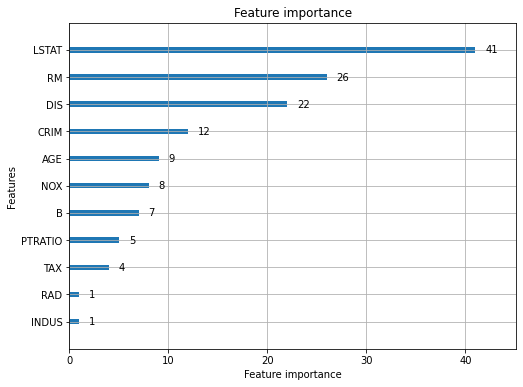

In [20]:
lgb.plot_importance(booster, figsize=(8,6));

[1]	Validation Set's rmse: 7.92565	Validation Set's l2: 62.816
[2]	Validation Set's rmse: 7.43199	Validation Set's l2: 55.2344
[3]	Validation Set's rmse: 7.00344	Validation Set's l2: 49.0482
[4]	Validation Set's rmse: 6.62963	Validation Set's l2: 43.952
[5]	Validation Set's rmse: 6.26432	Validation Set's l2: 39.2417
[6]	Validation Set's rmse: 5.96457	Validation Set's l2: 35.576
[7]	Validation Set's rmse: 5.71239	Validation Set's l2: 32.6314
[8]	Validation Set's rmse: 5.48724	Validation Set's l2: 30.1098
[9]	Validation Set's rmse: 5.28215	Validation Set's l2: 27.9011
[10]	Validation Set's rmse: 5.13839	Validation Set's l2: 26.403


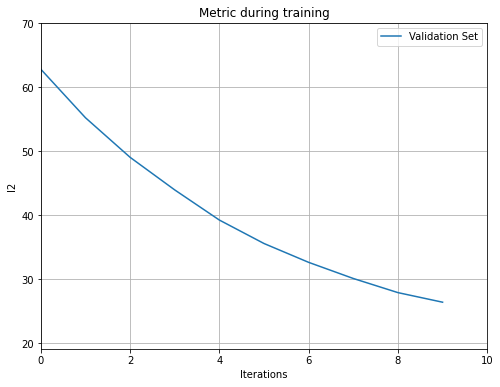

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)
booster = lgb.LGBMModel(objective="regression", n_estimators=10,)
booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),], eval_metric="rmse", eval_names = ["Validation Set"],
            feature_name=boston.feature_names.tolist()
           )

lgb.plot_metric(booster, figsize=(8,6));

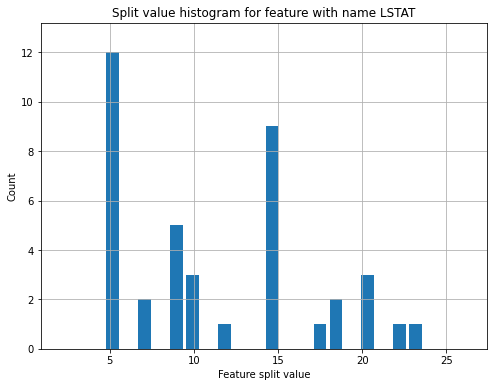

In [22]:
lgb.plot_split_value_histogram(booster, feature="LSTAT", figsize=(8,6));

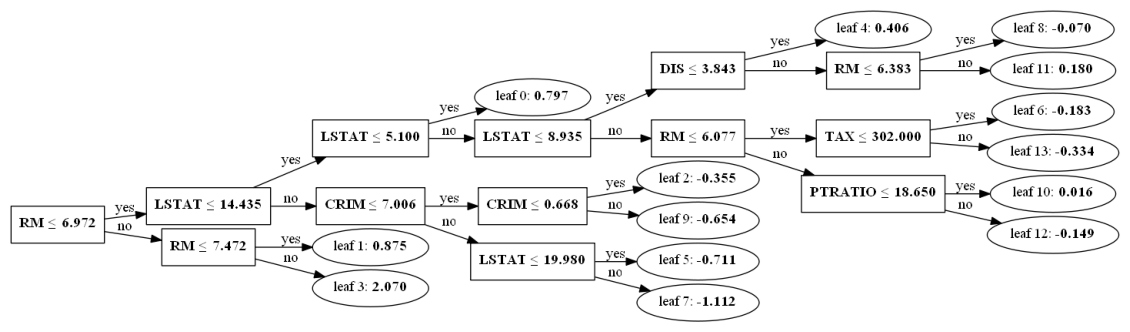

In [23]:
lgb.plot_tree(booster, tree_index = 1, figsize=(20,12));

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="binary", n_estimators=100, metric="auc")

booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),],
            early_stopping_rounds=3)

from sklearn.metrics import accuracy_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("Test  Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

Размеры Train/Test:  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's auc: 0.965699
Training until validation scores don't improve for 3 rounds
[2]	valid_0's auc: 0.984194
[3]	valid_0's auc: 0.981935
[4]	valid_0's auc: 0.981613
[5]	valid_0's auc: 0.979032
Early stopping, best iteration is:
[2]	valid_0's auc: 0.984194
Test  Accuracy: 0.66
Train Accuracy: 0.62


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="binary", n_estimators=100, metric="auc")

booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),],
            callbacks=[lgb.early_stopping(3)]
            )

from sklearn.metrics import accuracy_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("\nTest  Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

Размеры Train/Test:  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's auc: 0.970012
Training until validation scores don't improve for 3 rounds
[2]	valid_0's auc: 0.977968
[3]	valid_0's auc: 0.977866
[4]	valid_0's auc: 0.975112
[5]	valid_0's auc: 0.975724
Early stopping, best iteration is:
[2]	valid_0's auc: 0.977968

Test  Accuracy: 0.60
Train Accuracy: 0.64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, train_size=0.90, random_state=42)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=boston.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=boston.feature_names.tolist())

booster = lgb.train({"objective": "regression", "verbosity": -1, "metric": "rmse",
                    'interaction_constraints':[[0,1,2,11,12], [3, 4],[6,10], [5,9], [7,8]]},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

[1]	valid_0's rmse: 7.50225
[2]	valid_0's rmse: 7.01989
[3]	valid_0's rmse: 6.58246
[4]	valid_0's rmse: 6.18581
[5]	valid_0's rmse: 5.83873
[6]	valid_0's rmse: 5.47166
[7]	valid_0's rmse: 5.19667
[8]	valid_0's rmse: 4.96259
[9]	valid_0's rmse: 4.69168
[10]	valid_0's rmse: 4.51653


In [27]:
booster = lgb.train({"objective": "regression", "verbosity": -1, "metric": "rmse",
                    'monotone_constraints':(1,0,1,-1,1,0,1,0,-1,1,1, -1, 1)},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

[1]	valid_0's rmse: 7.50077
[2]	valid_0's rmse: 7.01013
[3]	valid_0's rmse: 6.57254
[4]	valid_0's rmse: 6.19802
[5]	valid_0's rmse: 5.8771
[6]	valid_0's rmse: 5.59538
[7]	valid_0's rmse: 5.35168
[8]	valid_0's rmse: 5.15228
[9]	valid_0's rmse: 4.95664
[10]	valid_0's rmse: 4.81777


In [28]:
def first_grad(predt, dmat):
    '''Вычисли первую производную для MSE.'''
    y = dmat.get_label() if isinstance(dmat, lgb.Dataset) else dmat
    return 2*(y-predt)

def second_grad(predt, dmat):
    '''Вычисли вторую производную для MSE.'''
    y = dmat.get_label() if isinstance(dmat, lgb.Dataset) else dmat
    return [1] * len(predt)

def mean_sqaured_error(predt, dmat):
    ''''Функция MSE.'''
    predt[predt < -1] = -1 + 1e-6
    grad = first_grad(predt, dmat)
    hess = second_grad(predt, dmat)
    return grad, hess

In [29]:
booster = lgb.LGBMModel(objective=mean_sqaured_error, n_estimators=10,)
booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),], eval_metric="rmse")

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("Test  R2 Score: %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score: %.2f"%r2_score(Y_train, train_preds))

[1]	valid_0's rmse: 18.1052
[2]	valid_0's rmse: 14.5847
[3]	valid_0's rmse: 11.7345
[4]	valid_0's rmse: 9.5314
[5]	valid_0's rmse: 7.78258
[6]	valid_0's rmse: 6.50828
[7]	valid_0's rmse: 5.56412
[8]	valid_0's rmse: 4.73723
[9]	valid_0's rmse: 4.1203
[10]	valid_0's rmse: 3.73135
Test  R2 Score: 0.78
Train R2 Score: 0.82


In [30]:
def mean_absolute_error(preds, dmat):
    actuals = dmat.get_label() if isinstance(dmat, lgb.Dataset) else dmat
    err = (actuals - preds).sum()
    is_higher_better = False
    return "MAE", err, is_higher_better

booster = lgb.train({"objective": "regression", "verbosity": -1, "metric": "rmse"},
                    feval=mean_absolute_error,
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)


test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("Test  R2 Score: %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score: %.2f"%r2_score(Y_train, train_preds))

[1]	valid_0's rmse: 7.40798	valid_0's MAE: -74.3941
[2]	valid_0's rmse: 6.83504	valid_0's MAE: -68.5244
[3]	valid_0's rmse: 6.32897	valid_0's MAE: -63.4968
[4]	valid_0's rmse: 5.90259	valid_0's MAE: -59.304
[5]	valid_0's rmse: 5.53393	valid_0's MAE: -55.712
[6]	valid_0's rmse: 5.17631	valid_0's MAE: -52.3329
[7]	valid_0's rmse: 4.87576	valid_0's MAE: -48.2586
[8]	valid_0's rmse: 4.62314	valid_0's MAE: -46.1631
[9]	valid_0's rmse: 4.38363	valid_0's MAE: -41.8425
[10]	valid_0's rmse: 4.2398	valid_0's MAE: -39.1324
Test  R2 Score: 0.71
Train R2 Score: 0.76


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)
booster = lgb.LGBMModel(objective=mean_sqaured_error, n_estimators=10,)
booster.fit(X_train, Y_train,
            eval_set=[(X_test, Y_test),], eval_metric="rmse",
            callbacks=[lgb.reset_parameter(learning_rate=np.linspace(0.1,1,10).tolist())])

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("Test  R2 Score : %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score : %.2f"%r2_score(Y_train, train_preds))

[1]	valid_0's rmse: 18.8867
[2]	valid_0's rmse: 11.681
[3]	valid_0's rmse: 5.62218
[4]	valid_0's rmse: 3.7574
[5]	valid_0's rmse: 3.46007
[6]	valid_0's rmse: 3.43556
[7]	valid_0's rmse: 3.33996
[8]	valid_0's rmse: 3.66852
[9]	valid_0's rmse: 3.87725
[10]	valid_0's rmse: 3.89931
Test  R2 Score : 0.80
Train R2 Score : 0.93
